# quantify degree of geostrophy with instantaneous fields, plots for skim


In [2]:
import os, sys, shutil
import numpy as np
import dask
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

import xgcm

from mitequinox.utils import *
#from mitequinox.dynamic import *
from mitequinox.plot import *

In [3]:
from dask_jobqueue import PBSCluster
cluster = PBSCluster(cores=1)
w = cluster.scale(5) # postprocessing

/home/mp/pontea/.conda/envs/equinox/lib/python3.6/site-packages/dask_jobqueue/config.py:12: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)
/home/mp/pontea/.conda/envs/equinox/lib/python3.6/site-packages/distributed/deploy/local.py:138: UserWarning: diagnostics_port has been deprecated. Please use `dashboard_address=` instead
  "diagnostics_port has been deprecated. "


In [4]:
# get dask handles and check dask server status
from dask.distributed import Client
client = Client(cluster)

In [5]:
cluster

---
## load global fields: instantaneous and subdiurnal


In [6]:
dsu = xr.concat([xr.open_zarr(work_data_dir+'mbal/%sgeo_f%02d_rms.zarr'%('u',face)) 
               for face in range(13)],dim='face').rename({'diff':'udiff'})
dsv = xr.concat([xr.open_zarr(work_data_dir+'mbal/%sgeo_f%02d_rms.zarr'%('v',face)) 
               for face in range(13)],dim='face').rename({'diff':'vdiff'})
ds = xr.merge([dsu,dsv])
ds = ds.assign_coords(f=2*omega_earth*np.sin(np.deg2rad(ds.YC))) # at center points
#
ds['uv_diff'] = np.sqrt(ds['udiff']**2 + ds['vdiff']**2)
ds['uv_coriolis_linear'] = np.sqrt(ds['ugeo_coriolis_linear']**2 + ds['vgeo_coriolis_linear']**2)
#
#ds_i = ds.isel(i=slice(0,None,8),j=slice(0,None,8)).persist()
ds_i = ds.isel(i=slice(0,None,4),j=slice(0,None,4)).persist()
print(ds_i)

<xarray.Dataset>
Dimensions:               (face: 13, i: 1080, j: 1080)
Coordinates:
  * i                     (i) int64 0 4 8 12 16 20 ... 4300 4304 4308 4312 4316
  * j                     (j) int64 0 4 8 12 16 20 ... 4300 4304 4308 4312 4316
    CS                    (face, j, i) float32 dask.array<shape=(13, 1080, 1080), chunksize=(1, 1080, 1080)>
    Depth                 (face, j, i) float32 dask.array<shape=(13, 1080, 1080), chunksize=(1, 1080, 1080)>
    SN                    (face, j, i) float32 dask.array<shape=(13, 1080, 1080), chunksize=(1, 1080, 1080)>
    XC                    (face, j, i) float32 dask.array<shape=(13, 1080, 1080), chunksize=(1, 1080, 1080)>
    YC                    (face, j, i) float32 dask.array<shape=(13, 1080, 1080), chunksize=(1, 1080, 1080)>
  * face                  (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    f                     (face, j, i) float32 dask.array<shape=(13, 1080, 1080), chunksize=(1, 1080, 1080)>
Data variables:
    udiff        

In [7]:
dsu = xr.concat([xr.open_zarr(work_data_dir+'mbal/%sgeo_subd_f%02d_rms.zarr'%('u',face)) 
               for face in range(13)],dim='face').rename({'diff':'udiff'})
dsv = xr.concat([xr.open_zarr(work_data_dir+'mbal/%sgeo_subd_f%02d_rms.zarr'%('v',face)) 
               for face in range(13)],dim='face').rename({'diff':'vdiff'})
ds = xr.merge([dsu,dsv])
ds = ds.assign_coords(f=2*omega_earth*np.sin(np.deg2rad(ds.YC))) # at center points
#
ds['uv_diff'] = np.sqrt(ds['udiff']**2 + ds['vdiff']**2)
ds['uv_coriolis_linear'] = np.sqrt(ds['ugeo_coriolis_linear']**2 + ds['vgeo_coriolis_linear']**2)
#
#ds_s = ds.isel(i=slice(0,None,8),j=slice(0,None,8)).persist()
ds_s = ds.isel(i=slice(0,None,4),j=slice(0,None,4)).persist()
print(ds_s)

<xarray.Dataset>
Dimensions:               (face: 13, i: 1080, j: 1080)
Coordinates:
  * i                     (i) int64 0 4 8 12 16 20 ... 4300 4304 4308 4312 4316
  * j                     (j) int64 0 4 8 12 16 20 ... 4300 4304 4308 4312 4316
    CS                    (face, j, i) float32 dask.array<shape=(13, 1080, 1080), chunksize=(1, 1080, 1080)>
    Depth                 (face, j, i) float32 dask.array<shape=(13, 1080, 1080), chunksize=(1, 1080, 1080)>
    SN                    (face, j, i) float32 dask.array<shape=(13, 1080, 1080), chunksize=(1, 1080, 1080)>
    XC                    (face, j, i) float32 dask.array<shape=(13, 1080, 1080), chunksize=(1, 1080, 1080)>
    YC                    (face, j, i) float32 dask.array<shape=(13, 1080, 1080), chunksize=(1, 1080, 1080)>
  * face                  (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    f                     (face, j, i) float32 dask.array<shape=(13, 1080, 1080), chunksize=(1, 1080, 1080)>
Data variables:
    udiff        

### flow rms

{'fig': <Figure size 1080x1080 with 2 Axes>,
 'ax': <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x2b294c9edeb8>,
 'cbar': <matplotlib.colorbar.Colorbar at 0x2b297da7b7b8>}

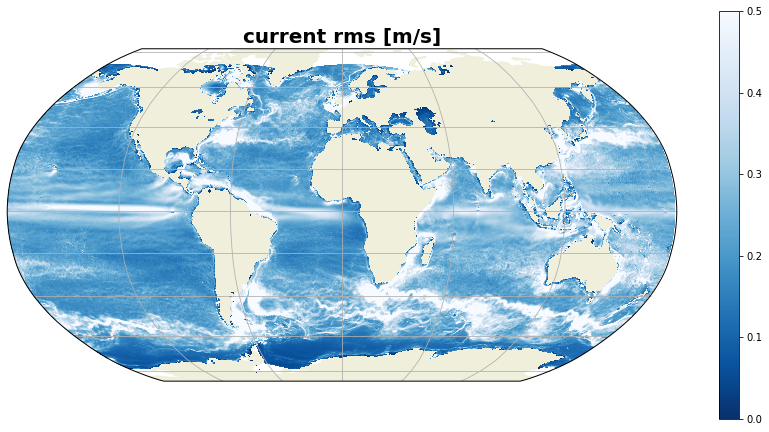

In [14]:
plot_pretty(ds_i.uv_coriolis_linear/np.abs(ds.f), title='current rms [m/s]',
#            vmin=0., vmax=.5, cmap=cm.thermal, ignore_face=[6],
            vmin=0., vmax=.5, cmap=plt.get_cmap('Blues_r'), ignore_face=[6],
            colorbar=True, colorbar_kwargs={'shrink':.5})

{'fig': <Figure size 1080x1080 with 2 Axes>,
 'ax': <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x2b2980b336a0>,
 'cbar': <matplotlib.colorbar.Colorbar at 0x2b298679cac8>}

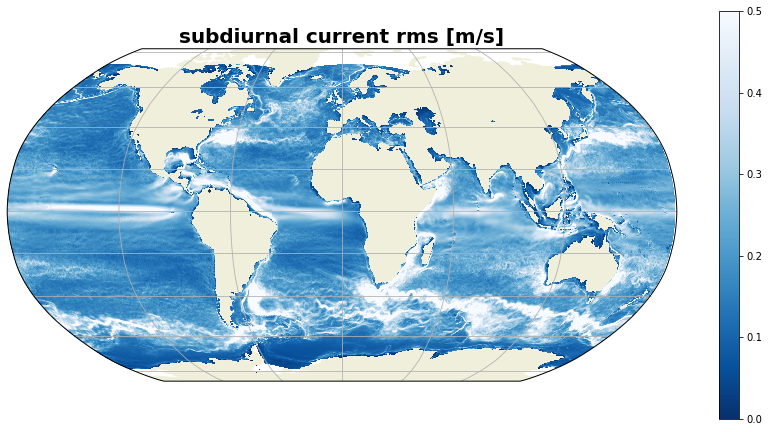

In [15]:
plot_pretty(ds_s.uv_coriolis_linear/np.abs(ds.f), title='subdiurnal current rms [m/s]',
#            vmin=0., vmax=.5, cmap=cm.thermal, ignore_face=[6],
            vmin=0., vmax=.5, cmap=plt.get_cmap('Blues_r'), ignore_face=[6],
            colorbar=True, colorbar_kwargs={'shrink':.5})

### ageostrophic kinetic energy over total kinetic energy

/home/mp/pontea/.conda/envs/equinox/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in less
  return func(*args2)
/home/mp/pontea/.conda/envs/equinox/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/home/mp/pontea/.conda/envs/equinox/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in less
  return func(*args2)
/home/mp/pontea/.conda/envs/equinox/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in less
  return func(*args2)
/home/mp/pontea/.conda/envs/equinox/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in less
  return func(*args2)
/home/mp/pontea/.conda/envs/equinox/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in less
  return func(*args2)
/home/mp/pontea/.conda/envs/equinox/lib/python3.6/site-packages/dask/

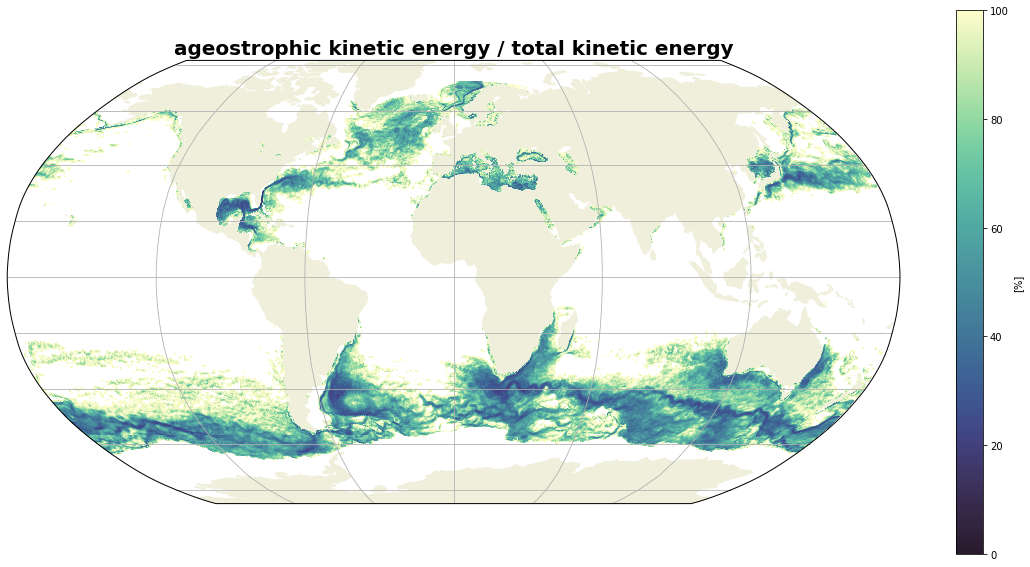

In [4]:
toplt = ds_i.uv_diff/ds_i.uv_coriolis_linear * 100
toplt = toplt.where(toplt<100.)
hdl = plot_pretty(toplt, title='ageostrophic kinetic energy / total kinetic energy',
            vmin=0., vmax=100., cmap=cm.deep_r, ignore_face=[6],
            colorbar=True, colorbar_kwargs={'shrink':.5, }, figsize=(20,20))
hdl['cbar'].set_label('[%]')

/home/mp/pontea/.conda/envs/equinox/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in less
  return func(*args2)
/home/mp/pontea/.conda/envs/equinox/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/home/mp/pontea/.conda/envs/equinox/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in less
  return func(*args2)
/home/mp/pontea/.conda/envs/equinox/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in less
  return func(*args2)
/home/mp/pontea/.conda/envs/equinox/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in less
  return func(*args2)
/home/mp/pontea/.conda/envs/equinox/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in less
  return func(*args2)
/home/mp/pontea/.conda/envs/equinox/lib/python3.6/site-packages/dask/

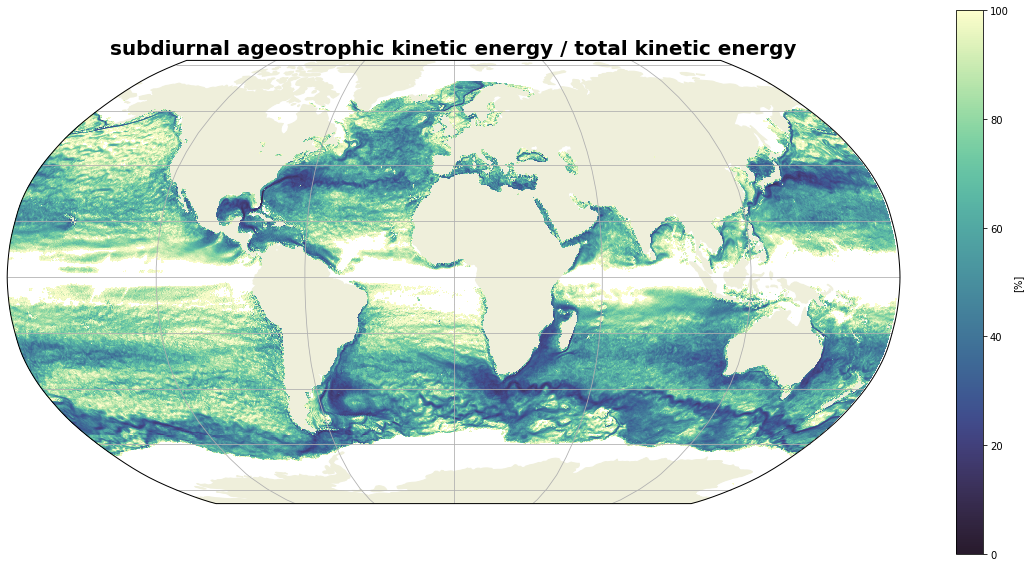

In [5]:
toplt = ds_s.uv_diff/ds_s.uv_coriolis_linear*100.
toplt = toplt.where(toplt<100.)
hdl = plot_pretty(toplt, title='subdiurnal ageostrophic kinetic energy / total kinetic energy',
            vmin=0., vmax=100., cmap=cm.deep_r, ignore_face=[6],
            colorbar=True, colorbar_kwargs={'shrink':.5}, figsize=(20,20))
hdl['cbar'].set_label('[%]')

---

In [6]:
cluster.close()